***
<!-- <img src="../images/santander-logo-png.png" alt="alt text" width="70"/> -->

# <font color='red' size=10>Case Data Masters - Santander </font>

Link do Projeto no GitHub: https://github.com/caiquefilipini/case-data-masters

___

# <font color=green>Sumário</font>

<!-- <font size=3> -->
[1. Enunciado Geral](#1.-Enunciado-Geral)<br>

[2. Questão A](#2.-Questão-A)
- [2.1. Enunciado](#2.1.-Enunciado)
- [2.2. Solução](#2.2.-Solução)
    - [2.2.1. Imports & Configs](#2.2.1.-Imports-&-Configs)
    - [2.2.2. Carregando os Dados](#2.2.2.-Carregando-os-Dados)
    - [2.2.3. Informações sobre os Dados](#2.2.3.-Informações-sobre-os-Dados)
    - [2.2.4. Divisão da base em Treino e Teste](#2.2.4.-Divisão-da-base-em-Treino-e-Teste)
    - [2.2.5. Separando a base em Treino e Validação](#2.2.5.-Separando-a-base-em-Treino-e-Validação)
    - [2.2.6. Definindo a Função Objetivo](#2.2.6.-Definindo-a-Função-Objetivo)
    - [2.2.7. Criando um Baseline](#2.2.7.-Criando-um-Baseline)
    - [2.2.8. Data Prep & Modelagem](#2.2.8.-Data-Prep-&-Modelagem)
    - [2.2.9. Ajustando o Modelo nos Dados de Treino e Validação](#2.2.9.-Ajustando-o-Modelo-nos-Dados-de-Treino-e-Validação)
    - [2.2.10. Escorando o Modelo na Base de Teste](#2.2.10.-Escorando-o-Modelo-na-Base-de-Teste)
    - [2.2.11. Calculando a Perfomance do Modelo](#2.2.11.-Calculando-a-Perfomance-do-Modelo)
    - [2.2.12. Ajustando o Modelo em todo o Conjunto de Dados](#2.2.12.-Ajustando-o-Modelo-em-todo-o-Conjunto-de-Dados)
    - [2.2.13. Salvando o Modelo que será colocado em Produção](#2.2.13.-Salvando-o-Modelo-que-será-colocado-em-Produção)
    - [2.2.14. Criando uma função que Escora a Base](#2.2.14.-Criando-uma-função-que-Escora-a-Base)
    - [2.2.15. Possíveis melhorias para a V2](#2.2.15.-Possíveis-melhorias-para-a-V2)

[3. Questão B](#3.-Questão-B)
- [3.1. Enunciado](#3.1.-Enunciado)
- [3.2. Solução](#3.2.-Solução)
    - [3.2.1. Definindo o Ponto de Corte Ótimo](#3.2.1.-Definindo-o-Ponto-de-Corte-Ótimo)
    - [3.2.2. Atribuindo as Notas na Base de Teste](#3.2.2.-Atribuindo-as-Notas-na-Base-de-Teste)
    - [3.2.3. Calculando o Benefício Esperado da Ação de Retenção](#3.2.3.-Calculando-o-Benefício-Esperado-da-Ação-de-Retenção)
    - [3.2.4. Possíveis melhorias para a V2](#3.2.4.-Possíveis-melhorias-para-a-V2)

[4. Questão C](#4.-Questão-C)
- [4.1. Enunciado](#4.1.-Enunciado)
- [4.2. Solução](#4.2.-Solução)
    - [4.2.1. Escalonando os Dados](#4.2.1.-Escalonando-os-Dados)
    - [4.2.2. Definindo a Quantidade Ideal de Clusters](#4.2.2.-Definindo-a-Quantidade-Ideal-de-Clusters)
    - [4.2.3. Ajustando o Modelo Final](#4.2.3.-Ajustando-o-Modelo-Final)
    - [4.2.4. Calculando o Lucro Esperado por Cliente de Cada Cluster](#4.2.4.-Calculando-o-Lucro-Esperado-por-Cliente-de-Cada-Cluster)
    - [4.2.5. Adaptando a Função para Escorar os Clusters](#4.2.5.-Adaptando-a-Função-para-Escorar-os-Clusters)
    - [4.2.6. Possíveis melhorias para a V2](#4.2.6.-Possíveis-melhorias-para-a-V2)
    


<!-- <\font> -->


***

# <font color=green>1. Enunciado Geral</font>

Para resolver este case você usará um conjunto de dados sintéticos contendo um grande núero de variáveis numéricas. A coluna 'TARGET' é a variável resposta. Ela é igual:

> 1 para clientes insatisfeitos<br>
> 0 para clientes satisfeitos

Duas bases são dadas, uma para treino e uma para avaliação. Três são a tarefas a serem realizadas.
<br><br>
BASES: As bases (train e test) podem ser encontradas aqui: https://www.kaggle.com/c/santander-customer-satisfaction/data

[Sumário](#Sumário)

***

# <font color=green>2. Questão A</font>

## 2.1. Enunciado

Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ele não se comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um valor fixo de 10 reais por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar o comportamento do cliente.
<br><br>
Um falso negativo ocorre quando um cliente é previsto como satisfeito, ma na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada foi ganho.
<br><br>
Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de retenção. O benefício neste caso é o lucro da ação (100 reais) menos os custos relacionados à ação de retenção (10 reais)
<br><br>
Por fim, um verdadeiro negativo é um cliente insatisfeito que não é alvo de nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro.
<br><br>
A primeira tarefa deste case é maximizar o lucro esperado por cliente considerando o contexto descrito no parágrafo acima.

[Sumário](#Sumário)

***

## 2.2. Solução

Podemos traduzir o parágrafo do exercício pela seguinte tabela:

|Caso|Custo|Receita|
|---|---|---|
|Falso Positivo|10|0|
|Falso Negativo|0|0|
|Verdadeiro Positivo|10|100|
|Verdadeiro Negativo|0|0|

Essa tabela guiará o desenvolvimento do nosso modelo, pois através desses números é que saberemos se nosso modelo é lucrativo ou não.

[Sumário](#Sumário)

### 2.2.1. Imports & Configs

In [782]:
# Basics
import os
import numpy as np
import pandas as pd
from scipy.stats import variation
import datetime

# Plots
import matplotlib.pyplot as plt

# Data Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline, Pipeline

# ML
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import pickle

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

In [488]:
# Names & Paths
ROOT = os.path.dirname(os.getcwd())
DATA = os.path.join(ROOT, 'data')
NOTEBOOKS = os.path.join(ROOT, 'notebooks')
TRAIN_DATA = os.path.join(DATA, 'train.csv')
TEST_DATA = os.path.join(DATA, 'test.csv')
MODELS = os.path.join(ROOT, 'models')
DATA_OUTPUT = os.path.join(DATA, 'output')

In [4]:
# Configs
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 30)

plt.rcParams["figure.figsize"] = (15, 10)

[Sumário](#Sumário)

### 2.2.2. Carregando os Dados

In [5]:
df_train = pd.read_csv(TRAIN_DATA)

In [6]:
df_test = pd.read_csv(TEST_DATA)

In [7]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


[Sumário](#Sumário)

### 2.2.3. Informações sobre os Dados

In [8]:
df_train.shape, df_test.shape

((76020, 371), (75818, 370))

In [9]:
df_test.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

A base de teste não possui a variável TARGET.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


A base de treino possui 369 features (todas numéricas) + o ID do cliente + a variável TARGET

In [11]:
df_train['TARGET'].unique() # Target Binária

array([0, 1], dtype=int64)

In [12]:
df_train['TARGET'].value_counts(normalize=True) * 100

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

A target possui o forte desbalanceamento, com apenas 4% dos clientes insatisfeitos. Precisaremos cuidar deste ponto mais tarde.

In [13]:
# Missings
print(f'qtd nulos (train): {df_train.isnull().sum().sum()}')
print(f'qtd nulos (test): {df_test.isnull().sum().sum()}')

qtd nulos (train): 0
qtd nulos (test): 0


Não há valores nulos (nan) nas bases de treino e teste.

[Sumário](#Sumário)

### 2.2.4. Divisão da base em Treino e Teste

Como a base de teste não possui a target, não conseguiremos validar nosso modelo por meio dela. Isso significa que podemos interpretá-la como a base que teremos quando o modelo estiver em produção, pois realmente desconhecemos as targets.<br><br>

Desta forma, vamos separar um conjunto da nossa base de treino para utilizá-la como **teste**. Isso significa que esse conjunto de dados ficará separado até o final da modelagem, isto é, até termos nosso modelo pronto. Não poderemos utilizar esse subset para absolutamente nada, nem para uma simples análise exploratória. Isso porque quando testarmos nosso modelo, devemos procurar refletir da forma mais fiel possível o cenário em produção.<br><br>

Também não é correto otimizarmos nosso modelo com base na perfomance nos dados de teste. Fazendo isso, estaríamos, mesmo que de forma indireta, overfittando nosso algoritmo.<br><br>

Dito isso, utilizaremos a base de teste apenas após o nosso algoritmo estiver otimizado (nos dados de **validação**), para calcular, da maneira mais fiel possível, a performance do nosso modelo no ambiente de produção.<br><br>

Para separar a base de teste, uma boa prática é utilizar a técnica de estratificação, procurando manter as proporções, a fim de que (de novo) nossa performance seja mais fiel possível ao cenário em produção. Neste caso, vamos estratificar apenas pela target, porém isso poderia ser (e geralmente é) feito com outras variáveis também.<br><br>

In [14]:
df = df_train.copy()

In [15]:
perc_train = .7

Resolvi deixar 30% dos dados para teste. É importante termos um bom volume de dados para treinar, mas tão importante quanto é termos uma quantidade significativa de dados para testar nosso modelo. E lembrando que aqui temos uma base desbalanceada. Se deixarmos pouca massa para teste, teremos um número insuficiente de casos da classe minoritária, o que pode causar uma alta variância na perfomance do nosso modelo (ser muito alta ou muito baixa), afetando negativamente nossa interpretação sobre o modelo.

***Sem Estratificação***

In [19]:
n_train = int(perc_train * len(df))
n_test = len(df) - n_train

In [20]:
n_train + n_test == len(df)

True

In [21]:
n_train, n_test

(53214, 22806)

In [22]:
np.random.seed()
df_train = df.sample(n_train).reset_index(drop=True)
df_test = df.sample(n_test).reset_index(drop=True)

In [23]:
df_train.shape, df_test.shape

((53214, 371), (22806, 371))

In [24]:
df_train['TARGET'].value_counts(normalize=True) * 100

0    96.068704
1     3.931296
Name: TARGET, dtype: float64

In [25]:
df_test['TARGET'].value_counts(normalize=True) * 100

0    96.237832
1     3.762168
Name: TARGET, dtype: float64

Perceba que, ao separar os dados com a técnica aleatória simples, as proporções da TARGET são diferentes. Logo, vamos precisar utilizar uma função/lib que faça a estratificação pela TARGET.

***Com Estratificação***

In [26]:
df_train, df_test = train_test_split(
    df, train_size=perc_train, random_state=123, shuffle=True, stratify=df['TARGET']
)

In [27]:
df_train['TARGET'].value_counts(normalize=True) * 100

0    96.042395
1     3.957605
Name: TARGET, dtype: float64

In [28]:
df_test['TARGET'].value_counts(normalize=True) * 100

0    96.0449
1     3.9551
Name: TARGET, dtype: float64

Agora sim. Temos as mesmas proporções de TARGET nos dados de treino e teste.

In [29]:
# Escrevendo os dados
df_train.to_csv(os.path.join(DATA, 'train_caique.csv'), index=False)
df_test.to_csv(os.path.join(DATA, 'test_caique.csv'), index=False)

In [30]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
65891,131559,2,36,0.0,0.0,57.33,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291260.700000,0
62390,124579,2,38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
23274,46536,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104330.460000,0
50111,100068,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
50402,100640,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150614.760000,0


In [31]:
# Resetando os índices
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

Pronto! Temos nossas bases separadas em treino e teste. Vou apagar a base de teste por enquanto, para evitar qualquer tipo de "vasculhada" (nem sei se existe essa palava).

In [32]:
del df_test

[Sumário](#Sumário)

### 2.2.5. Separando a base em Treino e Validação

Vamos utilizar a técnica Holdout novamente (fizemos isso quando separamos o conjunto de teste) para criar um subset de validação. Esse conjunto servirá para validarmos a perfomance dos nossos modelos e guiará a otimização dos hiperparâmetros.<br><br>

Aliás, um adendo rápido sobre esse ponto...

É muito comum vermos a separação apenas em treino e teste. Nesses casos, o algoritmo é ajustado na base treino e escorado na base de teste. Ao final, o algoritmo que teve a melhor performance na base de teste é escolhido para ser colocado em produção.<br><br>

O problema dessa abordagem é que, mesmo escorando o modelo nos dados de teste que não foram vistos no treinamento, de certa forma, mesmo que indiretamente, há um vazamento de dados (*data leakage*) para a etapa de treinamento. Isso porque a escolha dos hiperparâmetros foi enviesada pela performance no conjunto de teste. De alguma forma você utilizou informações do teste para guiar seu treinamento.<br><br>

Isso não costuma ser um GRANDE problema na prática, mas pode sim superestimar um pouco a performance do modelo, e com isso inflar o cálculo de benefício esperado do projeto.

In [39]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,131559,2,36,0.0,0.0,57.33,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291260.700000,0
1,124579,2,38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
2,46536,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104330.460000,0
3,100068,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4,100640,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150614.760000,0


In [40]:
df_train.shape

(53214, 371)

In [41]:
df_train.shape[0] * .75, df_train.shape[0] * .25

(39910.5, 13303.5)

Nessa etapa, poderíamos ter utilizado a validação cruzada, ao invés do Holdout. Porém, como os dados estão desbalanceados, quando fizéssemos o resampling (under ou over) das classes, teríamos que fazê-lo apenas nos folds de treinamento, caso contrário teríamos dois problemas:

1. Vazamento de dados. Ao fazer o resampling de toda a base antes de dividir os folds de treino e validação, você acaba utilizando informações dos dados de validação para criar o resampling.
2. Sua perfomance seria ilusória e incomparável com os dados de teste. Isso porque você está validando seu modelo num fold balanceado, que não reflete o cenário real, isto é, aquele que o modelo enfrentará em produção.

Para fazer isso, precisaríamos construir uma função que tivesse essa dinâmica na separação dos folds. Para simplificar e também assumindo que já estou sendo bem rigoroso com o tratamento dos dados, resolvi utilizar a simples técnica Holdout nesta etapa também.

In [42]:
df_t, df_v = train_test_split(
    df_train, train_size=.75, random_state=123, shuffle=True, stratify=df_train['TARGET']
)

In [43]:
df_t.shape, df_v.shape

((39910, 371), (13304, 371))

In [44]:
df_t.reset_index(drop=True, inplace=True)
df_v.reset_index(drop=True, inplace=True)

Pronto! Temos uma base de treino e uma de validação. Agora podemos iniciar a modelagem...

[Sumário](#Sumário)

### 2.2.6. Definindo a Função Objetivo

Antes de sair ajustando os modelos, precisamos definir a função que queremos otimizar com nosso algoritmo. Como vimos na conceituação do problema, apenas os *Falsos Positivos* e os *Verdadeiros Positivos* afetam o cálculo do lucro. Nos outros dois casos, a receita e a despesa são iguais a 0.

|Caso|Custo|Receita|
|---|---|---|
|Falso Positivo|10|0|
|Falso Negativo|0|0|
|Verdadeiro Positivo|10|100|
|Verdadeiro Negativo|0|0|

Isso não significa que podemos ter *Falsos Negativos* e *Verdadeiros Negativos* à vontade. Pois tudo que deixamos de ganhar, também pode ser considerado como perda (o famoso "custo de oportunidade").

In [33]:
confusion_matrix([0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 0, 0, 0, 1])

array([[2, 1],
       [2, 2]], dtype=int64)

In [34]:
confusion_matrix([0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 0, 0, 0, 1])[0]

array([2, 1], dtype=int64)

In [35]:
# Posições

# [0][0] --> Verdadeiros Negativos
# [0][1] --> Falsos Positivos
# [1][0] --> Falsos Negativos
# [1][1] --> Verdadeiros Positivos

In [228]:
def cost(y_true, y_pred):
    
    y_true = list(y_true)
    y_pred = list(y_pred)
    
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0][1] # 0 - 10 = -10 lucro
    tp = cm[1][1] # 100 - 10 = 90 lucro
    
    profit = 90 * int(tp) - 10 * int(fp)
    
    return profit

In [37]:
y_true = df_train['TARGET']

In [38]:
cost(y_true, y_true)

189540

Função objetivo definida com sucesso!

[Sumário](#Sumário)

### 2.2.7. Criando um Baseline

Antes de começar a explorar os dados ou até mesmo modelar, é importante criarmos um *baseline*. O baseline será uma performance base, obtida com o modelo mais simples e rápido que pudermos de fazer. Ele servirá para nos dar uma referência de métrica. Isto é, se nosso modelo *ultra max power nitro 8* tiver uma performance similar ou até pior ao nosso baseline, não vale a pena colocá-lo em produção, pois a complexidade e o custo computacional não serão compensados por perfomance.<br><br>

Por outro lado, se nosso modelo apresentar uma perfomance muito superior ao baseline, isso nos mostrará que de fato conseguimos extrair padrões "escondidos" e mais complexos nos dados, algo que um modelo simples não foi capaz de fazer.

In [45]:
# Fitando o modelo
rf_baseline = RandomForestClassifier(random_state=123)
rf_baseline.fit(df_t.drop(['ID', 'TARGET'], axis=1), df_t['TARGET'])

RandomForestClassifier(random_state=123)

In [46]:
# Calculando a perfomance
cost(df_v['TARGET'], rf_baseline.predict(df_v.drop(['ID', 'TARGET'], axis=1)))

760

In [47]:
df_t.shape

(39910, 371)

Pois é! 760 reais de lucro com o modelo mais basicão que poderíamos construir. Mas e agora? Será que esse valor é bom ou ruim? Se tivéssemos um modelo perfeito, que acertasse perfeitamente todos os casos, quanto teríamos de lucro?

In [48]:
cost(df_v['TARGET'], df_v['TARGET'])

47430

In [49]:
f'{(760 / 47430) * 100:.2f}%'

'1.60%'

É meus amigos... Mais de 47 mil reais. Ou seja, esse modelo basicão que treinamos representa pouco mais de 1% do lucro "possível". Mas tudo bem... esse é apenas um baseline. É o trabalho mais "nas coxas" que poderíamos ter feito. Então, não desanimemos...

Para efeito de comparação, vou criar aqui rapidamente um modelo que atribui aleatoriamente 0 ou 1 para cada instância e vamos ver o que acontece...

In [50]:
np.random.seed(123)
cost(df_v['TARGET'], np.random.randint(2, size=len(df_v['TARGET'])))

-39630

Vish... vimos aqui que se deixarmos na mão do aleatório, vamos perder uma bela grana... Isso também nos mostra que o modelo basicão já conseguiu capturar alguns padrões e já consegue ser lucrativo, ainda que timidamente.

Um último teste que quero fazer aqui é... Bom, vimos que o lucro do *Verdadeiro Positivo* é 90 e o *Falso Positivo* tem um prejuízo de 10. Os outros não geram nem receita nem despesa. Pois bem... e se nosso modelo prever *Positivo* para todo mundo? Qual seria o resultado? Boravê...

In [51]:
cost(df_v['TARGET'], np.ones(len(df_v['TARGET'])))

-80340

Eita... pior que o modelo aleatório... E faz sentido... Na real, aqui nem precisaríamos de modelo. Poderíamos apenas multiplicar a quantidade de casos da classe 1 por 90 e subtrair (10 * quantidade de casos da classe 0). O ponto aqui é que mesmo tendo um lucro muito maior por cada caso positivo que acertamos, temos um volume muito maior de casos da outra classe.

Certo... Temos nosso baseline! Vamos considerar que conseguimos atingir 1.6% do lucro "possível" e tentar melhorar essa perfomance com técnicas mais avançadas.

[Sumário](#Sumário)

### 2.2.8. Data Prep & Modelagem

**Feature Selection**

Bom... temos um grande número de features. Vamos começar por reduzir um pouco a dimensionalidade dos dados, jogando fora features irrelevantes, que não possuem poder preditivo e podem mais atrapalhar do que ajudar.<br><br>

Vamos utilizar algumas estratégias para fazer isso...

1. Eliminar features que não fazem sentido do ponto de vista de negócio.

    - Como as features estão mascaradas, não conseguimos saber o significado "semântico" delas. Por isso, acaba sendo imprudente julgar se uma feature faz ou não sentido apenas analisando seus valores. Portanto, vamos dar um *bypass* nessa estratégia e seguir para a próxima.

2. Eliminar features com pouca variância.

A princípio, vamos utilizar o coeficiência de variação, que é o desvio padrão / média.

In [52]:
cv_features = [variation(df_t[f]) for f in df_t.columns]

In [53]:
cv_features_pd = pd.DataFrame(data=cv_features, index=df_t.columns, columns=['cv']).sort_values(by='cv', ascending=True)

In [54]:
cv_features_pd.head()

,cv
delta_imp_trasp_var33_in_1y3,-89.336443
delta_num_trasp_var33_in_1y3,-89.336443
delta_num_aport_var33_1y3,-71.714403
delta_imp_aport_var33_1y3,-58.095613
var3,-25.604550


In [55]:
cv_features_pd.tail()

,cv
num_trasp_var33_out_hace3,NaN
num_trasp_var33_out_ult1,NaN
saldo_var2_ult1,NaN
saldo_medio_var13_medio_hace3,NaN
saldo_medio_var29_hace3,NaN


Temos algo a princípio estranho: features com 'cvs' negativos e features com 'cvs' nulos... Vamos investigar isso...

In [56]:
df_train['delta_imp_aport_var33_1y3'].value_counts()

 0.000000    53200
-1.000000        9
-0.940476        1
-0.916000        1
-0.950000        1
-0.666667        1
-0.700000        1
Name: delta_imp_aport_var33_1y3, dtype: int64

Certo... As features que possuem valores de cv negativo claramente possuem a média negativa, já que o desvio padrão é sempre positivo. Mas isso também nos levanta um alerta! Pode ser que existam variáveis em que o cv foi positivo (por conta de a média ser positiva), mas podem possuir valores negativos, o que inviabilizaria a utilização do cv.

Vamos ver se as variáveis com valores negativos possuem APENAS valores negativos. Se sim, podemos transformá-las em positivas sem perder a escala dos dados.

Primeiro, vamos coletar todas as variáveis que possuem valores negativos.

In [57]:
df_t.min()[df_t.min() < 0]

var3                           -999999.00
saldo_var5                       -2895.72
saldo_var8                        -843.39
saldo_var30                      -2895.72
saldo_var42                      -2895.72
delta_imp_aport_var13_1y3           -1.00
delta_imp_aport_var17_1y3           -1.00
delta_imp_aport_var33_1y3           -1.00
delta_imp_compra_var44_1y3          -1.00
delta_imp_reemb_var17_1y3           -1.00
delta_imp_trasp_var33_in_1y3        -1.00
delta_imp_venta_var44_1y3           -1.00
delta_num_aport_var13_1y3           -1.00
delta_num_aport_var17_1y3           -1.00
delta_num_aport_var33_1y3           -1.00
delta_num_compra_var44_1y3          -1.00
delta_num_reemb_var17_1y3           -1.00
delta_num_trasp_var33_in_1y3        -1.00
delta_num_venta_var44_1y3           -1.00
saldo_medio_var5_hace2            -128.37
saldo_medio_var5_hace3              -8.04
saldo_medio_var5_ult1             -922.38
saldo_medio_var5_ult3             -476.07
saldo_medio_var8_hace2            

In [58]:
print([df_t[c].max() for c in df_t.min()[df_t.min() < 0].index]) # Vendo os valores máximos das colunas que possuem valores negativos

[238, 600450.0, 240045.0, 3458077.32, 3008077.32, 9999999999.0, 9999999999.0, 0.0, 9999999999.0, 9999999999, 0, 9999999999.0, 9999999999.0, 9999999999.0, 0.0, 9999999999.0, 9999999999, 0, 9999999999.0, 600450.0, 1542339.36, 600450.0, 544365.57, 96405.63, 163151.52, 129161.7, 4210084.23]


Pois é... Aqui vemos que as variáveis possuem valores positivos também... Vamos precisar adotar uma abordagem alternativa...

Adotando uma abordagem alternativa...

Vamos ver qual a representatividade da moda de cada coluna...

In [59]:
perc_moda = [int(df_t[c].value_counts(normalize=True).iloc[0] * 100) for c in df_t.columns]

In [60]:
perc_moda_pd = pd.DataFrame(data=perc_moda, index=df_t.columns, columns=['perc_moda']).sort_values('perc_moda')

In [61]:
perc_moda_pd.value_counts().head(6)

perc_moda
99           168
100           50
97            26
95            22
98            15
93            10
dtype: int64

Temos 168 colunas em que a moda representa 99% dos valores da coluna e 50 colunas com a moda equivalente a 100% (ou seja, constante).

In [62]:
perc_moda_pd.value_counts().head(6).sum()

291

Mesmo as demais colunas (95% a 98%) tem uma variancia muito baixa. Mas aqui precisamos tomar um cuidado importante: nossa base é desbalanceada. Aproximadamente 4% das instâncias são da classe positiva. Não é prudente excluirmos as colunas sem avaliarmos se as distribuições destes valores são iguais nas duas classes.

Considerando as variáveis com representativade da moda acima de 95%, temos o total de 291 colunas. Mas antes de excluí-las do nosso dataset, vamos verificar se essa representatividade acontece nas duas classes.

In [63]:
cols_mode_95 = perc_moda_pd[perc_moda_pd['perc_moda'] >= 95].index

In [64]:
print(cols_mode_95)

Index(['num_ent_var16_ult1', 'saldo_medio_var13_corto_ult3',
       'imp_ent_var16_ult1', 'saldo_medio_var13_corto_ult1', 'num_var13_corto',
       'num_var13_corto_0', 'saldo_var12', 'num_var12',
       'saldo_medio_var12_ult3', 'ind_var13_corto_0',
       ...
       'num_trasp_var17_out_hace3', 'saldo_var18', 'num_reemb_var33_hace3',
       'saldo_var28', 'saldo_var27', 'saldo_var41', 'ind_var18_0', 'ind_var18',
       'num_trasp_var17_in_hace3', 'imp_reemb_var33_hace3'],
      dtype='object', length=288)


In [65]:
cols_mode_95_tgt_0 = pd.Series([int(df_t[df_t['TARGET'] == 0][c].value_counts(normalize=True).iloc[0] * 100) for c in cols_mode_95])
cols_mode_95_tgt_1 = pd.Series([int(df_t[df_t['TARGET'] == 1][c].value_counts(normalize=True).iloc[0] * 100) for c in cols_mode_95])

In [66]:
perc_moda_pd_cols_mode_95 = perc_moda_pd[perc_moda_pd['perc_moda'] >= 95].reset_index()

In [67]:
perc_moda_pd_cols_mode_95 = pd.concat([perc_moda_pd_cols_mode_95, cols_mode_95_tgt_0, cols_mode_95_tgt_1], axis=1)

In [68]:
perc_moda_pd_cols_mode_95.columns = ['var', 'perc_moda', 'perc_moda_tgt_0', 'perc_moda_tgt_1']

In [69]:
perc_moda_pd_cols_mode_95

,var,perc_moda,perc_moda_tgt_0,perc_moda_tgt_1
0,num_ent_var16_ult1,95,95,95
1,saldo_medio_var13_corto_ult3,95,95,99
2,imp_ent_var16_ult1,95,95,95
3,saldo_medio_var13_corto_ult1,95,95,99
4,num_var13_corto,95,95,99
...,...,...,...,...
283,saldo_var41,100,100,100
284,ind_var18_0,100,100,100
285,ind_var18,100,100,100
286,num_trasp_var17_in_hace3,100,100,100


Ótimo... Agora temos a representatividade da moda por classe... Vamos considerar o seguinte: se o mínimo entre as duas for maior ou igual a 95%, nós removemos a coluna. Ou seja, o número de colunas a serem removidas será menor ou igual a 291.

In [70]:
perc_moda_pd_cols_mode_95['min_perc_mode'] = perc_moda_pd_cols_mode_95.apply(lambda x: min(x['perc_moda_tgt_0'], x['perc_moda_tgt_1']), axis=1)

In [71]:
perc_moda_pd_cols_mode_95[perc_moda_pd_cols_mode_95['min_perc_mode'] >= 95]['var'].nunique()

278

In [72]:
278 / (df_t.shape[1] - 2)

0.7533875338753387

Conseguiremos reduzir 278 features do nosso dataset. Isso equilave a mais de 75% das features que tínhamos no ínicio do projeto. Um grande passo!

In [73]:
df_t.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,114261,2,23,0.0,788.16,788.16,0.0,0.0,0.0,0.0,0.0,788.16,788.16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71172.390000,0
1,72619,2,37,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
2,32245,2,32,0.0,568.83,644.73,0.0,0.0,0.0,0.0,0.0,568.83,644.73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
3,103618,2,44,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46100.040000,0
4,5000,2,33,0.0,508.14,819.33,0.0,0.0,0.0,0.0,0.0,508.14,819.33,60.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97857.750000,0


In [74]:
feat_remove = perc_moda_pd_cols_mode_95[perc_moda_pd_cols_mode_95['min_perc_mode'] >= 95]['var'].tolist()

# Não quero remover a Target e o ID nesta etapa... Por isso, excluo eles da lista caso tenham sido selecionados
try:
    feat_remove.remove('TARGET')
    feat_remove.remove('ID')
except:
    pass

In [75]:
df_t.drop(feat_remove, axis=1, inplace=True)

In [76]:
df_t.shape

(39910, 94)

Ficamos com 92 features (94 menos a TARGET e o ID. Vamos ver se o modelo já apresentou alguma melhora apenas com essa redução de features...

In [77]:
df_t.head()

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5_0,ind_var5,ind_var8_0,...,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,var38,TARGET
0,114261,23,788.16,788.16,788.16,788.16,0.0,0.0,788.16,0.0,0.0,788.16,1,1,0,...,0,0,3,24,18,9,51,3979.29,1741.95,3922.11,3214.44,0.0,0.0,71172.390000,0
1,72619,37,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,1,1,0,...,0,0,0,9,3,15,27,894.63,0.00,12196.41,6545.52,0.0,0.0,117310.979016,0
2,32245,32,568.83,644.73,568.83,644.73,0.0,0.0,568.83,0.0,0.0,568.83,1,1,0,...,0,0,9,0,3,9,12,1305.27,0.81,1490.91,932.34,0.0,0.0,117310.979016,0
3,103618,44,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,1,1,0,...,0,0,0,21,15,3,39,22904.67,89.34,184.65,7726.23,0.0,0.0,46100.040000,0
4,5000,33,508.14,819.33,508.14,819.33,60.0,120.0,568.14,60.0,120.0,568.14,1,1,0,...,6,3,18,12,0,3,15,1003.38,39.00,1348.74,797.04,0.0,0.0,97857.750000,0


In [78]:
cols_train = df_t.drop(['ID', 'TARGET'], axis=1).columns

In [79]:
rf = RandomForestClassifier(random_state=123)
rf.fit(df_t[cols_train], df_t['TARGET'])

RandomForestClassifier(random_state=123)

In [133]:
cost(df_v['TARGET'], rf.predict(df_v[cols_train]))

820

In [82]:
df_t.shape

(39910, 94)

Praticamente nenhuma melhoria ao utilizar exatamente o mesmo modelo do baseline. Isso até que faz sentido, visto que o Random Forest acaba desconsiderando as features irrelevantes. Quanto maior o número de features, mais features serão selecionadas por corte e, se a quantidade de variáveis relevantes for significativa, a chance de uma delas estar entre as escolhidas será maior e, portanto, tomará a frente em relação às features irrelevantes. E nesse caso, quanto maior o número de árvores, menor a chance de uma feature irrelevante ser escolhida para servir como ponto de corte. Isso já seria bem diferente se estivéssemos falando do algoritmo Extra Tree, que não seleciona a variável mais promissora (aquela com maior ganho de informação).

3. Features altamente correlacionadas

In [83]:
corr_matrix = df_t.corr().abs()

In [84]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [85]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [86]:
try:
    to_drop.remove('TARGET')
    to_drop.remove('ID')
except:
    pass

In [87]:
len(to_drop)

41

41 features possuem uma correlação com outra variável de mais de 90%. Vamos remover essas features, pois seu poder preditivo já está sendo representado por outra informação.

In [88]:
df_t.drop(to_drop, axis=1, inplace=True)

In [89]:
df_t.shape

(39910, 53)

Ficamos com 51 variáveis. Uma bela redução frente às quase 400 que tínhamos antes.

3. Eliminar features com poder preditivo menor do que uma feature aleatória.

In [90]:
df_t['RANDOM_FEATURE'] = np.random.randint(10, size=df_t.shape[0])

In [91]:
df_t.head()

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_ult1,ind_var5_0,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,ind_var37_cte,ind_var39_0,num_var4,...,num_med_var45_ult3,num_meses_var39_vig_ult3,num_op_var41_efect_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_ult1,var38,TARGET,RANDOM_FEATURE
0,114261,23,788.16,788.16,0.0,788.16,1,1,0,0,0,1,0,1,2,...,15,2,0,0,3,18,9,3979.29,1741.95,3922.11,3214.44,0.0,71172.390000,0,2
1,72619,37,0.00,0.00,0.0,0.00,1,1,0,0,0,1,1,1,2,...,9,2,0,0,0,3,15,894.63,0.00,12196.41,6545.52,0.0,117310.979016,0,4
2,32245,32,568.83,644.73,0.0,568.83,1,1,0,0,0,1,1,1,3,...,3,2,0,0,9,3,9,1305.27,0.81,1490.91,932.34,0.0,117310.979016,0,6
3,103618,44,0.00,0.00,0.0,0.00,1,1,0,0,1,1,0,1,2,...,12,1,0,0,0,15,3,22904.67,89.34,184.65,7726.23,0.0,46100.040000,0,3
4,5000,33,508.14,819.33,60.0,568.14,1,1,0,0,0,1,0,1,2,...,3,1,3,3,18,0,3,1003.38,39.00,1348.74,797.04,0.0,97857.750000,0,7


In [92]:
rf_random = RandomForestClassifier(n_estimators=1000, random_state=123, max_depth=10)
rf_random.fit(df_t.drop(['ID', 'TARGET'], axis=1), df_t['TARGET'])

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=123)

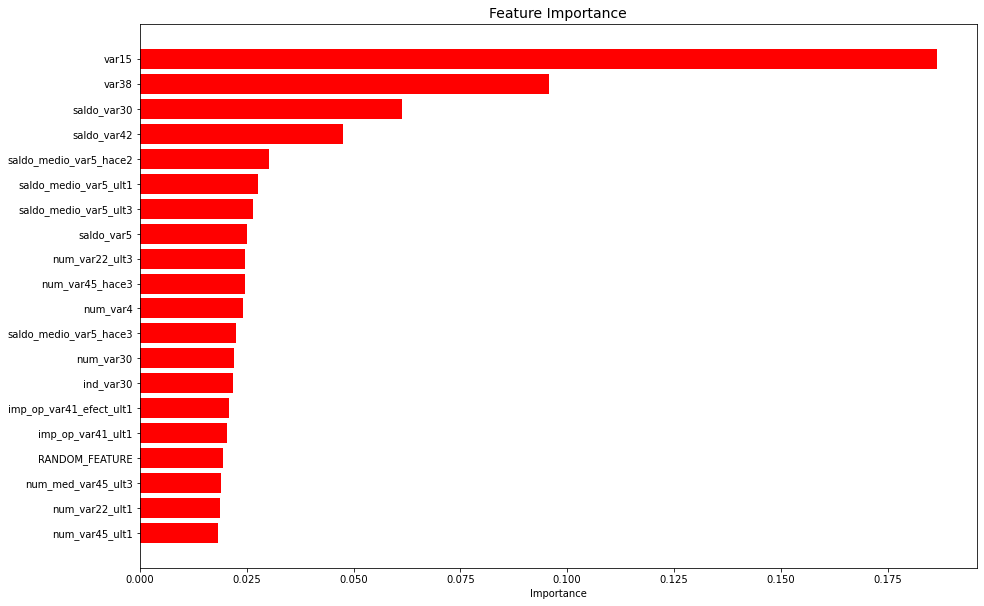

In [93]:
# Plot importance
features = df_t.drop(['ID', 'TARGET'], axis=1).columns
importances = rf_random.feature_importances_
indices = np.argsort(importances)[-20:]

plt.title('Feature Importance', size=14)
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

Rapaz! Reduzimos para apenas 16 features. Isso vai tornar o processo de otimização de hiperparâmetros muito mais simples, pois o espaço de "busca" foi reduzido drasticamente.

In [94]:
importance_random = importances[[i for i in indices if features[i] == 'RANDOM_FEATURE'][0]]

In [95]:
final_cols = [features[i] for i in indices if importances[i] > importance_random]

In [96]:
len(final_cols)

16

In [97]:
final_cols

['imp_op_var41_ult1',
 'imp_op_var41_efect_ult1',
 'ind_var30',
 'num_var30',
 'saldo_medio_var5_hace3',
 'num_var4',
 'num_var45_hace3',
 'num_var22_ult3',
 'saldo_var5',
 'saldo_medio_var5_ult3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_hace2',
 'saldo_var42',
 'saldo_var30',
 'var38',
 'var15']

**Escalonamento das features**

Como estamos trabalhando com um algoritmo baseado em árvore, não é necessário o escalonamento das features, pois a escala dos dados não tem importância. Isso seria extremamente necessário se tivéssemos utilizando algoritmos baseados em distância (kNN, SVM, por exemplos) ou então em modelos regressivos com regularização.

**Balanceamento dos dados**

Existem diversas formas de balancear os dados, mas podemos agrupá-las em basicamente dois tipos:

- Resampling: Reamostramos nossos dados de forma que as classes fiquem mais balanceadas, seja aumentando as instâncias da classe minoritária (oversampling) ou reduzindo as da classe majoritária (undersampling). Há uma grande variedade de técnicas que permitem fazer isso. A mais comum é o SMOTE, que consiste em criar exemplos fictícios utilizando os vizinhos próximos (nearest neighbors), o que é mais sofistado do que simplesmente replicar as instâncias já existentes na base.

- Class Weights: Essa estratégia consiste em dar mais importância (peso) para a classe minoritária, fazendo com que o algoritmo atribua uma punição maior para os erros desta classe. Isso não chega a ser um balanceamento da base, mas acaba funcionando como tal.

**Tuning dos Hiperparâmetros**

Nesta etapa, vamos criar um pipeline com estratégias de resampling e vários hiperparâmetros do Random Forest. Desta forma, conseguiremos otimizar nosso modelo não apenas pelos hiperparâmetos ótimos do algoritmo, mas também pela melhor estratégia de resampling, isto é, aquela que, combinada com o algoritmo, maximiza a perfomance do modelo.

In [413]:
pipe = Pipeline([
    # ('sampling', SmoteMode()),
    ('sampling', SMOTE()),
    ('model', RandomForestClassifier(random_state=123))
])

In [415]:
params = [
    {
        # Balanceamento
        # 'sampling__on': [True, False],
        'sampling__sampling_strategy': np.linspace(0.1, 1.0, 5).tolist(),

        # Random Forest
        'model__n_estimators': [1000],
        'model__max_depth': [5, 7, 10, 12],
        'model__class_weight':[{0:1, 1:1}],
        # 'model__criterion': ['gini', 'entropy'],
#         'model__min_samples_split': [0.0, 0.05, 0.1],
        'model__max_features': ['auto', 'sqrt']
    },

    {
        # Random Forest
        'model__n_estimators': [1000],
        'model__max_depth': [5, 7, 10, 12],
        'model__class_weight':['balanced', 'balanced_subsample', {0:1, 1:5}, {0:1, 1:10}],
        # 'model__criterion': ['gini', 'entropy'],
        # 'model__min_samples_split': [0.05, 0.1]
        'model__max_features': ['auto', 'sqrt']
    }
]

In [416]:
kf = StratifiedKFold(n_splits=4)

In [417]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    scoring=make_scorer(cost, greater_is_better=True),
    cv=kf,
    n_jobs=-1,
    verbose=10
)

In [418]:
X = df_t[final_cols]
y = df_t['TARGET']

In [419]:
grid.fit(X, y)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('model',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'model__class_weight': [{0: 1, 1: 1}],
                          'model__max_depth': [5, 7, 10, 12],
                          'model__max_features': ['auto', 'sqrt'],
                          'model__n_estimators': [1000],
                          'sampling__sampling_strategy': [0.1, 0.325, 0.55,
                                                          0.775, 1.0]},
                         {'model__class_weight': ['balanced',
                                                  'balanced_subsample',
                                                  {0: 1, 1: 5}, {0: 1, 1: 10}],
                          'model__max_depth': [5, 7, 10, 12],
                          

In [420]:
grid.best_score_

8665.0

In [421]:
grid.best_estimator_

Pipeline(steps=[('sampling', SMOTE(sampling_strategy=0.55)),
                ('model',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=10,
                                        n_estimators=1000, random_state=123))])

In [424]:
best_estimator = grid.best_estimator_

In [426]:
cost(df_v['TARGET'], best_estimator.predict(df_v[final_cols]))

10050

In [427]:
f'{(10050 / 47430) * 100:.2f}%'

'21.19%'

Excelente! Saímos de 1.6% do lucro ideal, para mais de 21%.

[Sumário](#Sumário)

### 2.2.9. Ajustando o Modelo nos Dados de Treino e Validação

Para escorar o modelo na base de teste e calcular a performance final do nosso modelo, podemos ajustar o algoritmo em todo o conjunto treino + validação, com os mesmos hiperparâmetros encontrados na otimização.

In [429]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,131559,2,36,0.0,0.0,57.33,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291260.700000,0
1,124579,2,38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
2,46536,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104330.460000,0
3,100068,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4,100640,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150614.760000,0


In [430]:
best_estimator.fit(df_train[final_cols], df_train['TARGET'])

Pipeline(steps=[('sampling', SMOTE(sampling_strategy=0.55)),
                ('model',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=10,
                                        n_estimators=1000, random_state=123))])

[Sumário](#Sumário)

### 2.2.10. Escorando o Modelo na Base de Teste

In [432]:
df_test = pd.read_csv(os.path.join(DATA, 'test_caique.csv'))

In [433]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,14836,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73806.810000,0
1,141428,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54606.780000,0
2,143561,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
3,29072,2,30,30.0,22.77,109.59,0.0,0.0,0.0,0.0,0.0,22.77,109.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4,99366,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [435]:
y_pred = best_estimator.predict(df_test[final_cols])

In [436]:
y_true = df_test['TARGET']

[Sumário](#Sumário)

### 2.2.11. Calculando a Perfomance do Modelo

In [438]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     21904
           1       0.19      0.46      0.27       902

    accuracy                           0.90     22806
   macro avg       0.58      0.69      0.61     22806
weighted avg       0.95      0.90      0.92     22806



In [439]:
cost(y_true, y_pred)

19920

In [441]:
perc_lucro_teste = cost(y_true, y_pred) / cost(y_true, y_true)

In [442]:
f'{perc_lucro_teste * 100:.2f}%'

'24.54%'

Conseguimos criar um modelo que atinge mais de 24% do lucro ideal da base.

Essa é a performance final do nosso modelo. Este é o número que reportaremos nas nossas apresentações e servirá também como referência para os futuros retreinos.

[Sumário](#Sumário)

### 2.2.12. Ajustando o Modelo em todo o Conjunto de Dados

Agora que calculamos a perfomance final do nosso modelo, podemos ajustá-lo a todos os dados que temos disponíveis para gerar o modelo que será colocado em produção. Note que apesar de estarmos retreinando nosso algoritmo, não estamos mais fazendo buscas por otimização. Nosso resultado já foi reportado com dados que o modelo nunca tinha visto. Para colocar o modelo em produção, podemos ajustar o algoritmo com os mesmos parâmetros definidos na etapa de otimização.

In [443]:
df_full = pd.read_csv(TRAIN_DATA)

In [444]:
final_estimator = best_estimator.fit(df_full[final_cols], df_full['TARGET'])

[Sumário](#Sumário)

### 2.2.13. Salvando o Modelo que será colocado em Produção

Vamos salvar em um arquivo binário todo o pipeline do modelo, desde a seleção das features até a escoragem do modelo.

In [446]:
full_pipe = {
    'cols': final_cols,
    'model': final_estimator
}

In [449]:
file_model = os.path.join(MODELS, 'model_v1.pkl')
pickle.dump(full_pipe, open(file_model, 'wb'))

[Sumário](#Sumário)

### 2.2.14. Criando uma função que Escora a Base

Agora, criamos uma função que recebe a base, faz todo o tratamento, atribui o escore do modelo e salva em um diretório (poderia ser uma base SQL ou qualquer outra forma de output).

In [496]:
def escora_base(df):
    
    # Carrega o modelo
    model_archive = os.listdir(os.path.join(MODELS))[0] # Vai buscar o primeiro arquivo da pasta MODELS
    filename = os.path.join(MODELS, model_archive)
    loaded_model = pickle.load(open(filename, 'rb'))
    
    # Escora a base
    X = df[loaded_model['cols']]
    score = loaded_model['model'].predict(X)
    df['score'] = score
    
    # Escreve a base com a data de hoje
    today = datetime.date.today().strftime('%Y%m%d')
    df_output_name = f'output_{today}.csv'
    df.to_csv(os.path.join(DATA_OUTPUT, df_output_name), index=False)
    
    # return df

In [497]:
df_prod = pd.read_csv(TEST_DATA)

In [498]:
df_prod.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72


In [499]:
escora_base(df)

In [502]:
df_output = pd.read_csv(os.path.join(DATA_OUTPUT, 'output_20220127.csv'))

In [503]:
df_output.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,score
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,0
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,0
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0


In [504]:
df_output['score'].value_counts()

0    68411
1     7407
Name: score, dtype: int64

[Sumário](#Sumário)

### 2.2.15. Possíveis melhorias para a V2

- Usar estratégias de categorização de features numéricas (ex: qcut, target encoding, etc.)
- Feature Engineering
- Redução de Dimensionalidade (PCA, por exemplo)
- Ensemble ou Stacking de Modelos com erros distintos

[Sumário](#Sumário)

***

# <font color=green>3. Questão B</font>

## 3.1. Enunciado

A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base de teste, respeitando a variável 'TARGET', isto é, o seu nível de satisfação, sendo 1 o mais INSATISFEITO e 5 o mais SATISFEITO. Ao dar essa nota deve-se ter em mente que somente os clientes com nota 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado por cliente (usando os mesmos valores da primeira questão).

[Sumário](#Sumário)

***

## 3.2. Solução

Para resolver essa questão, vamos utilizar as probabilidades que o modelo nos fornece. Precisamos fazer o corte mais lucrativo. No fundo, os clientes com notas de 2 a 5 não serão diferentes do ponto de vista específico desta ação de retenção. Ou seja, na prática, precisamos encontrar dois grupos. Os que receberão a ação e os que não receberão. Para este último, dividimos depois em 4 grupos iguais apenas para atender o que o enunciado nos pede. Isso é possível porque o enunciado não limitou a quantidade de clientes que receberão a ação e também não disse que os grupos precisam ser de igual tamanho.<br><br>

Se nosso objetivo é maximizar o lucro, precisamos ver qual é a probabilidade que, ao dividirmos a partir dela, os clientes que receberão a ação gerarão mais lucro.<br><br>

Voltaremos a trabalhar com a base de validação e deixaremos a de teste (a nossa, não a do exercício) de lado. Usaremos ela para medir a real perfomance do nosso modelo de atribuição de notas.<br><br>

E logo depois, vamos ler a base de teste do exercício e atribuir aos clientes as respectivas notas.

In [506]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,131559,2,36,0.0,0.0,57.33,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291260.700000,0
1,124579,2,38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
2,46536,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104330.460000,0
3,100068,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4,100640,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150614.760000,0


A 'df_train' é nossa base de treino + validação. Ou seja, é a base de treino que o próprio exercício nos forneceu MENOS o subset que separamos para TESTE.

Da solução anterior saiu o nosso modelo. Ele está pronto! É o 'best_estimator'. Vamos utilizá-lo para fazer um 'predict_proba' nessa base. "Ah Caíque, mas esse modelo já pronto foi ajustado com a fatia de teste também. Não deveríamos ajustar novamente apenas com os dados de treino + validação?" Não! Isso não faria o menor sentido. O nosso modelo está pronto e a função dele é "prever" se o cliente está ou não insatisfeito. Ele funciona bem para isso. O nosso objetivo agora é criar um novo "modelo" de corte, utilizando a saída desse modelo anterior que criamos. É como se essa variável output do modelo que criamos já fosse dada para nós e nossa função fosse apenas organizá-la de forma a maximizar o lucro. Não há vazamento de dados da forma como estamos fazendo.

[Sumário](#Sumário)

### 3.2.1. Definindo o Ponto de Corte Ótimo

In [770]:
# Ajustando a função de escoragem para que retorne a probabilidade ao invés da previsão

def escora_base_proba(df):
    
    # Carrega o modelo
    model_archive = os.listdir(os.path.join(MODELS))[0] # Vai buscar o primeiro arquivo da pasta MODELS
    filename = os.path.join(MODELS, model_archive)
    loaded_model = pickle.load(open(filename, 'rb'))
    
    # Escora a base
    X = df[loaded_model['cols']]
    probs = loaded_model['model'].predict_proba(X)[:, 1]
    df['probs'] = probs
    
    # Escreve a base com a data de hoje
    # today = datetime.date.today().strftime('%Y%m%d')
    # df_output_name = f'output_{today}.csv'
    # df.to_csv(os.path.join(DATA_OUTPUT, df_output_name), index=False)
    
    return df

In [508]:
df_train_probs = escora_base_proba(df_train)

In [510]:
df_train_probs[df_train_probs['TARGET'] == 1].head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,probs
101,28792,2,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73574.76,1,0.713711
109,26841,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102391.71,1,0.703886


Agora podemos calcular o lucro a cada delta de corte (vamos usar 5 p.p) e escolher o ponto que maximixar o lucro.

In [517]:
def calcula_cost_per_cut(y_true, y_proba):
    
    dict_profit = dict()
    cut = 0.0
    
    while cut <= 1.0:
        
        y_pred = [p >= cut for p in y_proba]
        profit = cost(y_true, y_pred)
        dict_profit[cut] = profit
        
        cut += .05

    return dict_profit

In [518]:
y_true = df_train_probs['TARGET']
y_proba = df_train_probs['probs']

profits = calcula_cost_per_cut(y_true, y_proba)

In [523]:
profits_per_cut = pd.DataFrame(data=profits.values(), index=profits.keys()).reset_index()
profits_per_cut.columns = ['cut', 'profit']
profits_per_cut

,cut,profit
0,0.00,-321540
1,0.05,-145890
2,0.10,-70030
3,0.15,-7820
4,0.20,19960
5,0.25,45090
6,0.30,55250
7,0.35,57730
8,0.40,57520
9,0.45,56530


In [584]:
max_profit = cost(df_train_probs['TARGET'], df_train_probs['TARGET'])
profits_per_cut['perc_profit'] = [float(f'{profit / max_profit:.2f}') for profit in profits_per_cut['profit']]

In [585]:
profits_per_cut

,cut,profit,perc_profit
0,0.00,-321540,-1.70
1,0.05,-145890,-0.77
2,0.10,-70030,-0.37
3,0.15,-7820,-0.04
4,0.20,19960,0.11
5,0.25,45090,0.24
6,0.30,55250,0.29
7,0.35,57730,0.30
8,0.40,57520,0.30
9,0.45,56530,0.30


Como a escala dos dados percorre os números negativos e positivos, esse percentual que acabamos de calcular precisa de um ajuste. Vamos considerar o tamanho do intervalo como referência e calcular a posição relativa dos lucros nesse intervalo. Desta forma, os valores serão comparáveis, além de nosso gráfico ficar com uma aparência muito melhor.

In [593]:
profit_min = cost(df_train_probs['TARGET'], (df_train_probs['TARGET']-1) * (-1))
profit_max = cost(df_train_probs['TARGET'], df_train_probs['TARGET'])

diff = profit_max - profit_min

In [597]:
profits_per_cut['diff_to_min'] = [abs(profit_min - profit) for profit in profits_per_cut['profit']]

In [599]:
profits_per_cut['perc_ajustado'] = [float(f'{diff_local / diff:.2f}') for diff_local in profits_per_cut['diff_to_min']]

In [600]:
profits_per_cut

,cut,profit,perc_profit,diff_to_min,perc_ajustado
0,0.00,-321540,-1.70,189540,0.27
1,0.05,-145890,-0.77,365190,0.52
2,0.10,-70030,-0.37,441050,0.63
3,0.15,-7820,-0.04,503260,0.72
4,0.20,19960,0.11,531040,0.76
5,0.25,45090,0.24,556170,0.79
6,0.30,55250,0.29,566330,0.81
7,0.35,57730,0.30,568810,0.81
8,0.40,57520,0.30,568600,0.81
9,0.45,56530,0.30,567610,0.81


Vamos plotar isso num gráfico pra ficar mais bonitinho e também pra parecermos mais inteligentes 🤓

In [601]:
x, y = profits_per_cut.iloc[:,0].values, profits_per_cut.iloc[:,4].values

In [602]:
cut_max = profits_per_cut.iloc[profits_per_cut['profit'].argmax()]

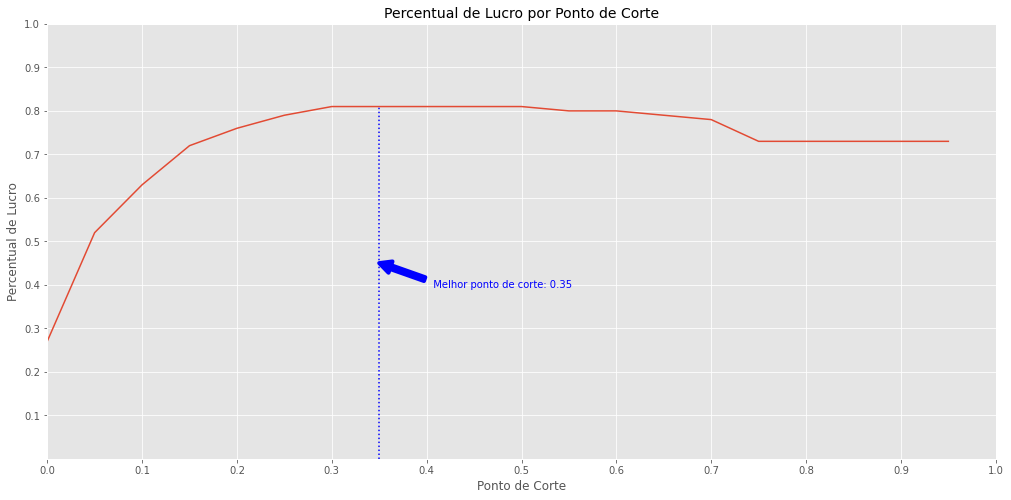

In [652]:
plt.figure(figsize=(17, 8))
plt.style.use('ggplot')
plt.plot(x, y)
plt.vlines(x=cut_max[0], ymin=0, ymax=cut_max[4], color='b', linestyles='dotted')
plt.title('Percentual de Lucro por Ponto de Corte', fontsize=14)
plt.ylabel('Percentual de Lucro')
plt.xlabel('Ponto de Corte')
plt.xticks(np.linspace(0, 1, 11))
plt.xlim([0, 1])
plt.yticks(np.linspace(.1, 1, 10))
plt.ylim([0, 1])
plt.annotate(text=f'  Melhor ponto de corte: {cut_max[0]}',
             xy=(0.35, 0.45),
             color='b', 
             xycoords='data',
             xytext=(0.4, 0.4),
             textcoords='data',
             horizontalalignment='left',
             verticalalignment='center',
             arrowprops=dict(color='b', lw=4));

Temos então que o melhor ponto de corte (mais lucrativo) é o 0.35. Ou seja, todos os clientes com escore maior ou igual a 0.35, terão nota 1. Os demais, agruparemos nas notas de 2 a 5.

In [659]:
np.round((df_train['probs'] >= .35).sum() / len(df_train), 2)

0.15

Considerando essa base, faremos a ação de retenção para 15% dos nossos clientes.

In [660]:
df_train['probs'] = np.round(df_train['probs'], 2)

In [712]:
notas = ['nota_2', 'nota_3', 'nota_4', 'nota_5']
notas.reverse()

_, cuts = pd.qcut(x=df_train[df_train['probs'] < 0.35]['probs'], q=4, labels=notas, retbins=True, precision=2. )

In [724]:
notas

['nota_5', 'nota_4', 'nota_3', 'nota_2']

In [713]:
cuts

array([0.  , 0.03, 0.07, 0.15, 0.34])

In [715]:
df_train['notas'] = pd.cut(df_train['probs'], bins=cuts, labels=notas, include_lowest=True)

In [716]:
df_train['notas'] = df_train['notas'].cat.add_categories('nota_1')

In [717]:
df_train['notas'].fillna('nota_1', inplace=True)

In [718]:
df_train[['probs', 'notas']].head(10)

,probs,notas
0,0.37,nota_1
1,0.06,nota_4
2,0.11,nota_3
3,0.02,nota_5
4,0.05,nota_4
5,0.72,nota_1
6,0.28,nota_2
7,0.03,nota_5
8,0.02,nota_5
9,0.11,nota_3


Para ter certeza se fizemos a classificação em ordem correta, vamos tirar a média das probabilidades para cada nota.

In [719]:
df_train.groupby('notas')['probs'].mean()

notas
nota_5    0.017322
nota_4    0.053439
nota_3    0.113121
nota_2    0.229660
nota_1    0.588173
Name: probs, dtype: float64

Perfeito, o cliente com a menor probabilidade de estar insatisfeito (ou maior probabilidade de estar satisfeito) está com a menor nota. Era exatamente essa a ideia.

[Sumário](#Sumário)

### 3.2.2. Atribuindo as Notas na Base de Teste

Primeiro, vamos adicionar os cuts no nosso arquivo pickle e adaptar nossa função...

In [725]:
full_pipe['cuts_notas'] = cuts
full_pipe['label_notas'] = notas

In [726]:
file_model = os.path.join(MODELS, 'model_v1.pkl')
pickle.dump(full_pipe, open(file_model, 'wb'))

In [748]:
def escora_base(df):
    
    # Carrega o modelo
    model_archive = os.listdir(os.path.join(MODELS))[0] # Vai buscar o primeiro arquivo da pasta MODELS
    filename = os.path.join(MODELS, model_archive)
    loaded_model = pickle.load(open(filename, 'rb'))
    
    # Escora a base
    X = df[loaded_model['cols']]
    score = loaded_model['model'].predict_proba(X)[:, 1]
    df['score'] = score
    
    # Calcula as notas
    cuts = loaded_model['cuts_notas']
    notas = loaded_model['label_notas']
    df['nota'] = pd.cut(df['score'], bins=cuts, labels=notas, include_lowest=True)
    try:
        df['nota'] = df['nota'].cat.add_categories('nota_1')
    except:
        pass
    df['nota'].fillna('nota_1', inplace=True)
    
    # Escreve a base com a data de hoje
    today = datetime.date.today().strftime('%Y%m%d')
    df_output_name = f'output_{today}.csv'
    df.to_csv(os.path.join(DATA_OUTPUT, df_output_name), index=False)
    
    # return df

Agora bora testar na base de teste (a do exercício, não a que criamos) para ver se funcionou...

In [749]:
df_teste_ex = pd.read_csv(TEST_DATA)

In [750]:
df_teste_ex.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


Boa... note que ela realmente não possui a TARGET, então é a base de teste do exercício mesmo. Bora escorar ela...

In [751]:
escora_base(df_teste_ex) # Não retorna nada, apenas escreve a base na pasta de output

Prontin... Agora vamos ler a base que a função acima acabou de escorar e ver se deu tudo certo...

In [752]:
df_output_notas = pd.read_csv(os.path.join(DATA_OUTPUT, 'output_20220128.csv'))

In [753]:
df_output_notas.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,score,nota
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,0.297239,nota_2
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,0.196125,nota_2
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0.019511,nota_5
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0.056449,nota_4
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0.007608,nota_5


Show... A base de output está correta. Possui a probabilidade de o cliente estar insatisfeito e sua respectiva nota. Agora, o processo que vem depois desta escoragem poderá filtrar os clientes com 'nota_1' e enviá-los para a ação de retenção.

In [755]:
df_output_notas['nota'].value_counts()

nota_5    16929
nota_3    16532
nota_2    15960
nota_4    15080
nota_1    11317
Name: nota, dtype: int64

In [756]:
df_output_notas['nota'].value_counts(normalize=True)

nota_5    0.223285
nota_3    0.218048
nota_2    0.210504
nota_4    0.198897
nota_1    0.149265
Name: nota, dtype: float64

Vemos aqui que na nossa base de produção (a de 'teste' do exercício), aproximadamente 15% dos clientes, equivalente a cerca de 11 mil clientes, receberá a ação de retenção.

[Sumário](#Sumário)

### 3.2.3. Calculando o Benefício Esperado da Ação de Retenção

Vamos ver qual o resultado dessa nossa estratégia de corte na nossa base de teste, para calcular o benefício esperado da nossa ação...

Para isso, vamos adaptar nossa função abaixo para retornar o resultado, e não escrevê-la em uma pasta.

In [758]:
def escora_base_retorna(df):
    
    # Carrega o modelo
    model_archive = os.listdir(os.path.join(MODELS))[0] # Vai buscar o primeiro arquivo da pasta MODELS
    filename = os.path.join(MODELS, model_archive)
    loaded_model = pickle.load(open(filename, 'rb'))
    
    # Escora a base
    X = df[loaded_model['cols']]
    score = loaded_model['model'].predict_proba(X)[:, 1]
    df['score'] = score
    
    # Calcula as notas
    cuts = loaded_model['cuts_notas']
    notas = loaded_model['label_notas']
    df['nota'] = pd.cut(df['score'], bins=cuts, labels=notas, include_lowest=True)
    try:
        df['nota'] = df['nota'].cat.add_categories('nota_1')
    except:
        pass
    df['nota'].fillna('nota_1', inplace=True)
    
    # Escreve a base com a data de hoje
    # today = datetime.date.today().strftime('%Y%m%d')
    # df_output_name = f'output_{today}.csv'
    # df.to_csv(os.path.join(DATA_OUTPUT, df_output_name), index=False)
    
    return df

In [759]:
df_resultado = escora_base_retorna(df=df_test)

In [760]:
df_resultado.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,score,nota
0,14836,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73806.810000,0,0.029534,nota_5
1,141428,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54606.780000,0,0.131123,nota_3
2,143561,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.005700,nota_5
3,29072,2,30,30.0,22.77,109.59,0.0,0.0,0.0,0.0,0.0,22.77,109.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.354038,nota_1
4,99366,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.035913,nota_4


In [761]:
df_resultado['pred_final'] = df_resultado['score'] >= 0.35

In [762]:
cost(df_resultado['TARGET'], df_resultado['pred_final']) # Lucro da ação na base de teste, com base no nosso modelo e estratégia de corte (0.35)

24880

In [763]:
cost(df_resultado['TARGET'], df_resultado['TARGET']) # Máximo lucro possível na base de teste

81180

In [764]:
24880 / 81180

0.30647942843064796

Lucro de quase 25 mil no nosso conjunto de teste, que representa 30% do lucro possível nesta base...

Para calcular a estimativa de benefício, precisamos saber a precisão do nosso modelo:

In [767]:
print(classification_report(df_resultado['TARGET'], df_resultado['pred_final']))

              precision    recall  f1-score   support

           0       0.98      0.87      0.93     21904
           1       0.17      0.65      0.27       902

    accuracy                           0.86     22806
   macro avg       0.58      0.76      0.60     22806
weighted avg       0.95      0.86      0.90     22806



Nossa precisão com essa estratégia de corte é de 17%. Ou seja, a cada 100 clientes que nosso modelo afirmar estarem INSATISFEITOS, 17 de fato estarão (Verdadeiros Positivos. Lucro de 90). Os outros 83 serão Falsos Positivos (Prejuízo de 10), ou seja, na realidade estarão SATISFEITOS.

In [769]:
# Calculando o benefício esperado da nossa ação da base de produção (teste do exercício)
(17/100 * 11317 * 90) - (83/100 * 11317 * 10)

# 11317 é a quantidade de clientes que receberão a ação
# 17/100 é a precisão do modelo (taxa de verdadeiros positivos)
# 83/100 é a taxa de falsos positivos

79219.00000000001

A estimativa de benefício na base de 'produção', portanto, é de quase 80 mil reais!!!

[Sumário](#Sumário)

### 3.2.4. Possíveis melhorias para a V2

- Abordagem com inferência causal para personalizar as ações de retenção por cliente
- Como estamos querendo otimizar o corte, o ideal seria que nosso modelo ordenasse da melhor maneira possível. Nesse sentido, na primeira questão, a AUC seria mais indicada do que a função objetivo que criamos. Isso porque nosso função faz com que o algoritmo otimize o custo já levando em consideração o corte de 0.5. Ao otimizar por AUC, garantiríamos ter o modelo que mais ordena bem e o ponto de corte ficaria a cargo da nossa própria escolha. O que acabou acontecendo aqui é que estamos utilizando o modelo que maximiza o lucro a partir do corte 0.5 para definir outro ponto de corte.

[Sumário](#Sumário)

***

# <font color=green>4. Questão C</font>

## 4.1. Enunciado

Todo o conjunto de dados é passível de ser divididos em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da primeira questão).

[Sumário](#Sumário)

***

## 4.2. Solução

Vamos agrupar nossos clientes levando em conta as mesmas variáveis que utilizamos para criar nosso modelo preditivo. Isso não é uma obrigatoriedade, visto que agrupamentos naturais podem surgir de variáveis que não possuem poder preditivo para determinada classe e mesmo assim fornecer insights valiosos.<br><br>

Contudo, os algoritmos de agrupamento em geral, sofrem bastante com bases em altas dimensões (muitas features), o que chamamos de *maldição da dimensionalidade*. Esse é um problema clássico de *Clustering* e acontece justamente qual o algoritmo acaba entendendo todos os pontos como equidistantes (mesma distância) devido ao alto numero de variáveis.<br><br>

Para evitar esse problema, o ideal é trabalhar com dados em baixas dimensões. Há diversas formas de fazer isso. Poderíamos partir da base completa com quase 400 variáveis, remover as variáveis altamente correlacionadas, escalonar os dados e aplicar um PCA, por exemplo. Isso nos traria dados em baixas dimensões, mas também poderia tornar os clusters pouco interpretáveis.<br><br>

Sendo assim, para manter uma certa conexão entre esta e as tarefas anteriores, vou utilizar as mesmas variáveis preditoras para criar os agrupamentos.<br><br>

Sobre o algoritmo de clusterização, utilizarei o kMeans, que é um algoritmo simples, rápido e costuma funcionar bem na prática, gerando agrupamentos que fazem sentido. É claro que, como todo algoritmo, ele tem seus prós e contras. Poderíamos aqui testar outros algoritmos de clusterização, como os hierárquicos e os que trabalham com densidade. Ou até mesmo outros algoritmos da classe do kMeans (particionais). Contudo optei por seguir apenas com o kMeans e considerei os demais no plano de melhoria para a V2.

[Sumário](#Sumário)

### 4.2.1. Escalonando os Dados

In [771]:
X_clusters = df_train[final_cols]

In [772]:
X_clusters.head()

,imp_op_var41_ult1,imp_op_var41_efect_ult1,ind_var30,num_var30,saldo_medio_var5_hace3,num_var4,num_var45_hace3,num_var22_ult3,saldo_var5,saldo_medio_var5_ult3,saldo_medio_var5_ult1,saldo_medio_var5_hace2,saldo_var42,saldo_var30,var38,var15
0,0.0,0.0,1,3,7.80,2,0,6,20.67,28.47,20.67,56.94,20.67,20.67,291260.700000,36
1,0.0,0.0,1,6,3.84,2,18,9,15.00,11.28,15.00,15.00,15.00,66015.00,117310.979016,38
2,0.0,0.0,1,3,2.82,1,0,0,3.00,2.94,3.00,3.00,3.00,3.00,104330.460000,27
3,0.0,0.0,1,3,0.00,1,0,0,3.00,2.88,3.00,2.76,3.00,3.00,117310.979016,23
4,0.0,0.0,0,0,0.00,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,150614.760000,23


In [776]:
scaler = StandardScaler()
X_clusters_scaled = pd.DataFrame(scaler.fit_transform(X_clusters), columns=X_clusters.columns)

In [777]:
X_clusters_scaled.head()

,imp_op_var41_ult1,imp_op_var41_efect_ult1,ind_var30,num_var30,saldo_medio_var5_hace3,num_var4,num_var45_hace3,num_var22_ult3,saldo_var5,saldo_medio_var5_ult3,saldo_medio_var5_ult1,saldo_medio_var5_hace2,saldo_var42,saldo_var30,var38,var15
0,-0.193051,-0.123317,0.602374,0.373159,-0.083231,1.002265,-0.371474,0.475550,-0.101461,-0.125451,-0.109832,-0.128721,-0.146138,-0.214859,0.888636,0.212396
1,-0.193051,-0.123317,0.602374,2.197106,-0.083608,1.002265,1.336337,0.958184,-0.102036,-0.127625,-0.110435,-0.132334,-0.146253,0.828531,-0.000801,0.366752
2,-0.193051,-0.123317,0.602374,0.373159,-0.083705,-0.091889,-0.371474,-0.489717,-0.103253,-0.128679,-0.111714,-0.133368,-0.146497,-0.215138,-0.067172,-0.482207
3,-0.193051,-0.123317,0.602374,0.373159,-0.083974,-0.091889,-0.371474,-0.489717,-0.103253,-0.128687,-0.111714,-0.133389,-0.146497,-0.215138,-0.000801,-0.790919
4,-0.193051,-0.123317,-1.660099,-1.450787,-0.083974,-1.186043,-0.371474,-0.489717,-0.103557,-0.129051,-0.112033,-0.133627,-0.146558,-0.215185,0.169488,-0.790919


In [779]:
X_clusters_scaled.describe().loc[['mean', 'std'],:]

,imp_op_var41_ult1,imp_op_var41_efect_ult1,ind_var30,num_var30,saldo_medio_var5_hace3,num_var4,num_var45_hace3,num_var22_ult3,saldo_var5,saldo_medio_var5_ult3,saldo_medio_var5_ult1,saldo_medio_var5_hace2,saldo_var42,saldo_var30,var38,var15
mean,-6.257590e-16,-9.804946e-17,-1.246836e-16,1.661506e-15,1.756576e-15,-1.720435e-16,1.133676e-15,9.395273e-16,2.420072e-16,1.388848e-15,3.041753e-16,6.009916e-16,2.471776e-15,1.983158e-15,1.200615e-15,-1.565576e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00


[Sumário](#Sumário)

### 4.2.2. Definindo a Quantidade Ideal de Clusters

Vamos utilizar o método da Silhueta para calcular a quantidade ideal de clusters...

In [ ]:
clusterings = [KMeans(n_clusters=i,n_init=get_num_of_initialization(i),random_state=42, n_jobs=-1).fit(X_train) 
               for i in range(min_n_clusters,max_n_clusters+1)]

In [784]:
models = [KMeans(n_clusters=k, n_init=10, random_state=123) for k in range(2, 21)]

In [789]:
silhouttes = [silhouette_score(X_clusters_scaled, model.fit_predict(X_clusters_scaled))
              for model in models]

In [792]:
x = range(2, 21)
y = silhouttes

In [793]:
k_ideal = x[np.argmax(silhouttes)]

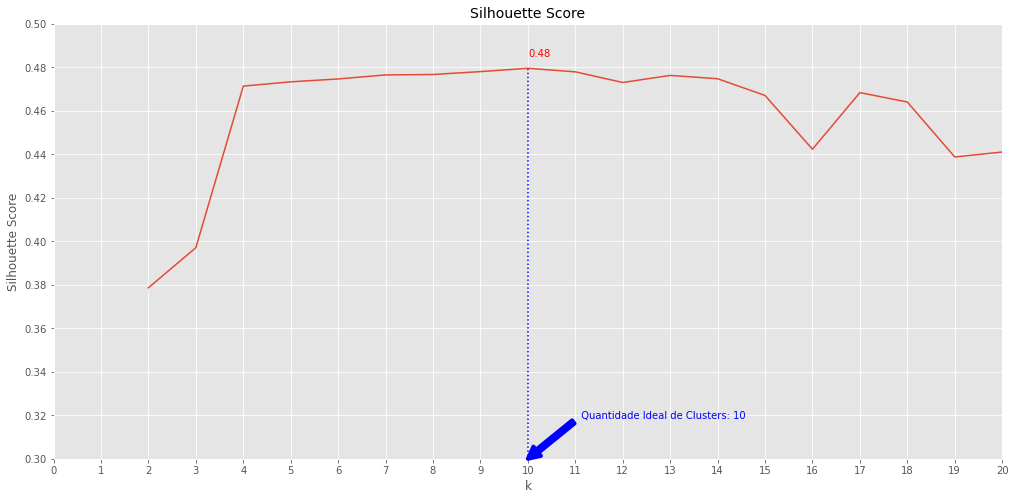

In [819]:
plt.figure(figsize=(17, 8))
plt.style.use('ggplot')
plt.plot(x, y)
plt.vlines(x=k_ideal, ymin=-1, ymax=np.max(silhouttes), color='b', linestyles='dotted')
plt.title('Silhouette Score', fontsize=14)
plt.ylabel('Silhouette Score')
plt.xlabel('k')
plt.xticks(np.linspace(0, 20, 21))
plt.xlim([0, 20])
plt.yticks(np.linspace(.3, .5, 11))
plt.ylim([0.3, .5])
plt.annotate(text=f'  Quantidade Ideal de Clusters: {k_ideal}',
             xy=(10, 0.3),
             color='b', 
             xycoords='data',
             xytext=(11, 0.32),
             textcoords='data',
             horizontalalignment='left',
             verticalalignment='center',
             arrowprops=dict(color='b', lw=4));
plt.annotate(text=f'{np.max(silhouttes):.2f}', xy=(10, 0.485), color='r');

[Sumário](#Sumário)

### 4.2.3. Ajustando o Modelo Final

In [820]:
km_final = KMeans(n_clusters=10, n_init=10, random_state=123).fit(X_clusters_scaled)

[Sumário](#Sumário)

### 4.2.4. Calculando o Lucro Esperado por Cliente de Cada Cluster

In [827]:
df_train.shape

(53214, 373)

In [830]:
df_test['cluster'] = km_final.predict(scaler.transform(df_test[final_cols]))

In [831]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,score,nota,pred_final,cluster
0,14836,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73806.810000,0,0.029534,nota_5,False,0
1,141428,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54606.780000,0,0.131123,nota_3,False,1
2,143561,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.005700,nota_5,False,0
3,29072,2,30,30.0,22.77,109.59,0.0,0.0,0.0,0.0,0.0,22.77,109.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.354038,nota_1,True,0
4,99366,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.035913,nota_4,False,0


In [832]:
df_test['cluster'].value_counts()

0    11438
1     6119
4     4203
3      522
6      408
2      102
7       10
8        3
5        1
Name: cluster, dtype: int64

Como ficamos com grupos muito pequenos, vou reduzir o k para 5...

In [845]:
km_final = KMeans(n_clusters=5, n_init=10, random_state=123).fit(X_clusters_scaled)

In [846]:
df_test['cluster'] = km_final.predict(scaler.transform(df_test[final_cols]))

In [847]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,score,nota,pred_final,cluster
0,14836,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73806.810000,0,0.029534,nota_5,False,1
1,141428,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54606.780000,0,0.131123,nota_3,False,2
2,143561,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.005700,nota_5,False,1
3,29072,2,30,30.0,22.77,109.59,0.0,0.0,0.0,0.0,0.0,22.77,109.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.354038,nota_1,True,1
4,99366,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.035913,nota_4,False,1


In [848]:
df_test['cluster'].value_counts()

1    12193
2     6119
0     3784
3      672
4       38
Name: cluster, dtype: int64

In [854]:
df_test['lucro'] = df_test.apply(lambda x: 90 if x['score'] >= 0.35 and x['TARGET'] == 1 else 0, axis=1)
df_test['prejuizo'] = df_test.apply(lambda x: -10 if x['score'] >= 0.35 and x['TARGET'] == 0 else 0, axis=1)
df_test['resultado'] = df_test['lucro'] + df_test['prejuizo']

In [855]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,score,nota,pred_final,cluster,lucro,prejuizo,resultado
0,14836,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73806.810000,0,0.029534,nota_5,False,1,0,0,0
1,141428,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,54606.780000,0,0.131123,nota_3,False,2,0,0,0
2,143561,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.005700,nota_5,False,1,0,0,0
3,29072,2,30,30.0,22.77,109.59,0.0,0.0,0.0,0.0,0.0,22.77,109.59,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.354038,nota_1,True,1,0,-10,-10
4,99366,2,24,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,0.035913,nota_4,False,1,0,0,0


In [857]:
df_test.groupby('cluster')['resultado'].mean().sort_values()

cluster
4    0.000000
1    0.041827
3    0.267857
0    1.337209
2    3.126328
Name: resultado, dtype: float64

Os grupos 2, 0 e 3 possuem, respectivamente, maior lucro esperado por cliente, levando em consideração o output do nosso modelo e as notas atribuídas aos clientes nos exercícios anteriores.

### 4.2.5. Adaptando a Função para Escorar os Clusters

In [858]:
full_pipe['scaler_cluster'] = scaler
full_pipe['model_cluster'] = km_final

In [859]:
file_model = os.path.join(MODELS, 'model_v1.pkl')
pickle.dump(full_pipe, open(file_model, 'wb'))

In [865]:
def escora_base(df):
    
    # Carrega o modelo
    model_archive = os.listdir(os.path.join(MODELS))[0] # Vai buscar o primeiro arquivo da pasta MODELS
    filename = os.path.join(MODELS, model_archive)
    loaded_model = pickle.load(open(filename, 'rb'))
    
    # Escora a base
    X = df[loaded_model['cols']]
    score = loaded_model['model'].predict_proba(X)[:, 1]
    df['score'] = score
    
    # Calcula as notas
    cuts = loaded_model['cuts_notas']
    notas = loaded_model['label_notas']
    df['nota'] = pd.cut(df['score'], bins=cuts, labels=notas, include_lowest=True)
    try:
        df['nota'] = df['nota'].cat.add_categories('nota_1')
    except:
        pass
    df['nota'].fillna('nota_1', inplace=True)
    
    # Atribui os clusters
    X_scaled = loaded_model['scaler_cluster'].transform(X)
    clusters = loaded_model['model_cluster'].predict(X_scaled)
    df['cluster'] = clusters
    
    # Escreve a base com a data de hoje
    today = datetime.date.today().strftime('%Y%m%d')
    df_output_name = f'output_{today}_with_clusters.csv'
    df.to_csv(os.path.join(DATA_OUTPUT, df_output_name), index=False)
    
    # return df

Vamos testar com a base de teste do exercício para ver se funcionou...

In [866]:
escora_base(df_teste_ex)

In [867]:
df_output_clusters = pd.read_csv(os.path.join(DATA_OUTPUT, 'output_20220128_with_clusters.csv'))

In [868]:
df_output_clusters.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,score,nota,cluster
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,0.297239,nota_2,1
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,0.196125,nota_2,1
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0.019511,nota_5,1
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0.056449,nota_4,2
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0.007608,nota_5,1


In [869]:
df_output_clusters['cluster'].value_counts()

1    40647
2    20082
0    12804
3     2166
4      119
Name: cluster, dtype: int64

Perfeito... Nossa função agora recebe a base e retorna o score (probabilidade de estar insatisfeito), a nota de 1 a 5 e o cluster ao qual o cliente pertence.

[Sumário](#Sumário)

### 4.2.6. Possíveis melhorias para a V2

- Fazer um *feature selection* específico para a tarefa de *clustering*
- Utilizar métodos de redução de dimensionalidade (PCA)
- Testar outros algoritmos de *clustering* (GMM, DBSCAN, Hierárquicos, etc.)
- Testar estratégias *soft* ao invés de *hard clustering*

[Sumário](#Sumário)

***

Testes e Rascunhos

Deixei aqui os códigos que fui testando ao longo do desenvolvimento. Grande parte deles não funcionou mesmo, mas ainda assim preferi guardá-los para preservar as ideias.

[Sumário](#Sumário)